##ML ASSIGNMENT 3

### Importing necessary libraries

In [83]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

###Read given csv file

In [84]:
df = pd.read_csv("Admission_Predict_A3.csv")

In [85]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

### Perform scaling using standard scaler

In [86]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=["Serial No.", "Chance of Admit "]))
column_names = df.columns[1:-1]
scaled_df = pd.DataFrame(scaled_data, columns=column_names)

In [87]:
X_train_scaled= scaled_df.values
y_test= df["Chance of Admit "]

###Convert the data into Tenserflow tensors

In [88]:
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor=tf.constant(y_test.values.reshape(-1,1),dtype=tf.float32) # Reshape to (400, 1)

In [89]:
# Initialize weights and bias as TensorFlow variables
weights = tf.Variable(tf.random.normal(shape=(X_train_tensor.shape[1], 1)))
bias = tf.Variable(tf.random.normal(shape=(1,)))

Epoch 100/1000, Loss: 0.5243076682090759
Epoch 200/1000, Loss: 0.12398528307676315
Epoch 300/1000, Loss: 0.04548749700188637
Epoch 400/1000, Loss: 0.021008899435400963
Epoch 500/1000, Loss: 0.011596192605793476
Epoch 600/1000, Loss: 0.0074614728800952435
Epoch 700/1000, Loss: 0.005501520819962025
Epoch 800/1000, Loss: 0.004535234067589045
Epoch 900/1000, Loss: 0.004049279261380434
Epoch 1000/1000, Loss: 0.0038022485096007586
Mean Squared Error on Test Data: 0.0038005211390554905


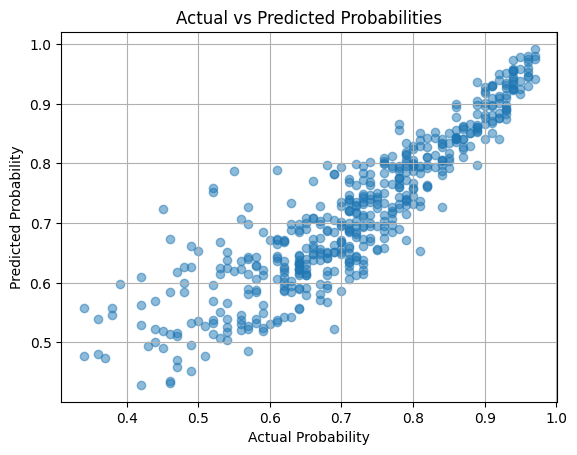

In [90]:
def linear_regression(X):
    return tf.matmul(X, weights) + bias

# Define the mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training the linear regression model
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, predictions)
    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.numpy()}")

# Evaluating the model
y_pred = linear_regression(X_train_tensor)
mse = mean_squared_error(y_train_tensor, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Plotting actual vs predicted probabilities
plt.scatter(y_test, y_pred.numpy(), alpha=0.5)
plt.xlabel("Actual Probability")
plt.ylabel("Predicted Probability")
plt.title("Actual vs Predicted Probabilities")
plt.grid(True)
plt.show()

###Logistic Regression

In [91]:
df[df['Chance of Admit ']>0.82].groupby('Chance of Admit ').mean()

Serial No.   GRE Score  TOEFL Score  University Rating  \
Chance of Admit                                                            
0.83              309.000000  326.500000   112.750000           3.750000   
0.84              255.636364  323.909091   109.636364           3.454545   
0.85              229.000000  322.000000   111.500000           3.666667   
0.86              246.900000  325.400000   114.400000           4.200000   
0.87              273.750000  325.625000   111.125000           4.625000   
0.88              127.000000  323.000000   110.750000           5.000000   
0.89              269.000000  328.636364   113.545455           4.363636   
0.90              186.777778  330.555556   116.111111           4.000000   
0.91              267.400000  330.500000   115.000000           4.500000   
0.92              226.888889  328.555556   114.888889           4.777778   
0.93              268.833333  330.583333   115.916667           4.583333   
0.94              160.846154  334.230769   116.692308           4.846154   
0.95              288.000000  336.200000   118.000000           4.400000   
0.96              239.500000  337.375000   116.000000           4.625000   
0.97              144.000000  337.500000   119.750000           4.750000   

                       SOP      LOR       CGPA  Research  
Chance of Admit                                           
0.83              3.875000  3.750000  9.032500  0.750000  
0.84              3.818182  3.772727  9.032727  0.909091  
0.85              4.083333  4.166667  9.041667  0.833333  
0.86              4.300000  4.300000  9.124000  0.900000  
0.87              4.375000  4.187500  9.101250  0.875000  
0.88              4.875000  4.500000  9.152500  1.000000  
0.89              4.318182  4.136364  9.270909  0.909091  
0.90              4.500000  4.111111  9.324444  1.000000  
0.91              4.250000  4.450000  9.328000  1.000000  
0.92              4.388889  4.500000  9.417778  1.000000  
0.93              4.583333  4.250000  9.477500  1.000000  
0.94              4.692308  4.846154  9.533077  1.000000  
0.95              4.900000  4.400000  9.540000  1.000000  
0.96              4.750000  4.687500  9.753750  1.000000  
0.97              4.250000  4.250000  9.875000  1.000000

In [92]:
var=df.columns.values.tolist()
y=df['Chance of Admit ']
x=[i for i in var if i not in ['chance']]
x=df[x]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)
cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [93]:
lr = LogisticRegression()
lr.fit(x_train, cy_train)
# Printing accuracy score & confusion matrix
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, lr.predict(x_test)))

Logistic regression accuracy: 0.980
--------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.92      1.00      0.96        24

    accuracy                           0.98       100
   macro avg       0.96      0.99      0.97       100
weighted avg       0.98      0.98      0.98       100



Using Binning


In [94]:
# Binning Process
bin_edges = [0.3, 0.5, 0.7, 1.0]
bin_labels = ['Low', 'Medium', 'High']
df['Admit Category'] = pd.cut(df['Chance of Admit '], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Encode categorical labels
label_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Admit Category'] = df['Admit Category'].map(label_map)

# Split data into features and target
X = df.drop(['Serial No.', 'Chance of Admit ', 'Admit Category'], axis=1)
y = df['Admit Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for 'Low', 'Medium', and 'High'
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 50
losses = []
for epoch in range(epochs):
    loss = model.train_on_batch(X_train_scaled, y_train)
    losses.append(loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/50, Loss: [1.3134872913360596, 0.33500000834465027]
Epoch 2/50, Loss: [1.3024917840957642, 0.3375000059604645]
Epoch 3/50, Loss: [1.2917474508285522, 0.3400000035762787]
Epoch 4/50, Loss: [1.2812505960464478, 0.3449999988079071]
Epoch 5/50, Loss: [1.2709962129592896, 0.35749998688697815]
Epoch 6/50, Loss: [1.2609798908233643, 0.36250001192092896]
Epoch 7/50, Loss: [1.2511968612670898, 0.36500000953674316]
Epoch 8/50, Loss: [1.2416424751281738, 0.375]
Epoch 9/50, Loss: [1.2323119640350342, 0.3824999928474426]
Epoch 10/50, Loss: [1.2232004404067993, 0.38999998569488525]
Epoch 11/50, Loss: [1.2143033742904663, 0.39500001072883606]
Epoch 12/50, Loss: [1.2056158781051636, 0.4000000059604645]
Epoch 13/50, Loss: [1.19713294506073, 0.4000000059604645]
Epoch 14/50, Loss: [1.1888500452041626, 0.4074999988079071]
Epoch 15/50, Loss: [1.1807622909545898, 0.42250001430511475]
Epoch 16/50, Loss: [1.1728650331497192, 0.4350000023841858]
Epoch 17/50, Loss: [1.1651535034179688, 0.447499990463256

**Softmax ensures that the output probabilities are interpretable and sum up to 1 across all classes, allowing the model to make decisions among the multiple classes effectively.**

Analysing the importance of learning rate by varying it's value.

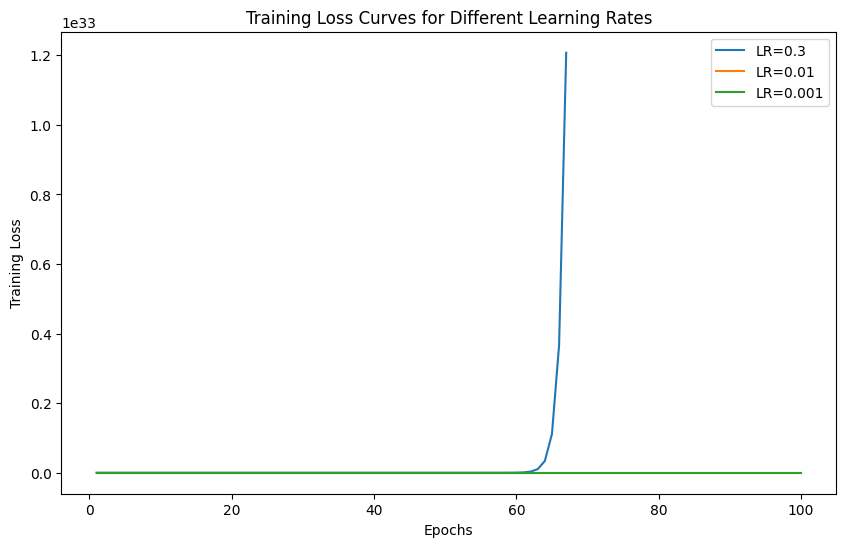

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to TensorFlow tensors
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)
def linear_regression(X):
    return tf.matmul(X, weights) + bias

# Mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Train the linear regression model with different learning rates
learning_rates = [0.3, 0.01, 0.001]
train_losses = []

for lr in learning_rates:
    weights = tf.Variable(tf.random.normal(shape=(X_train_tensor.shape[1], 1)))
    bias = tf.Variable(tf.random.normal(shape=(1,)))
    optimizer = tf.optimizers.SGD(learning_rate=lr)

    # Training loop
    epochs = 100
    train_loss_history = []

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = linear_regression(X_train_tensor)
            loss = mean_squared_error(y_train_tensor, predictions)
        gradients = tape.gradient(loss, [weights, bias])
        optimizer.apply_gradients(zip(gradients, [weights, bias]))
        train_loss_history.append(loss.numpy())

    train_losses.append(train_loss_history)

# Evaluate model performance on the test set
test_losses = []

for lr in learning_rates:
    predictions = linear_regression(X_test_tensor)
    test_loss = mean_squared_error(y_test_tensor, predictions).numpy()
    test_losses.append(test_loss)

# Plot training loss curves for different learning rates
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(1, epochs + 1), train_losses[i], label=f'LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Curves for Different Learning Rates')
plt.legend()
plt.show()

We can see how determining optimal learning rate plays an important role.

<ipython-input-96-3b8eb9b2b668>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()["Chance of Admit "].drop({"Chance of Admit ","Serial No."})


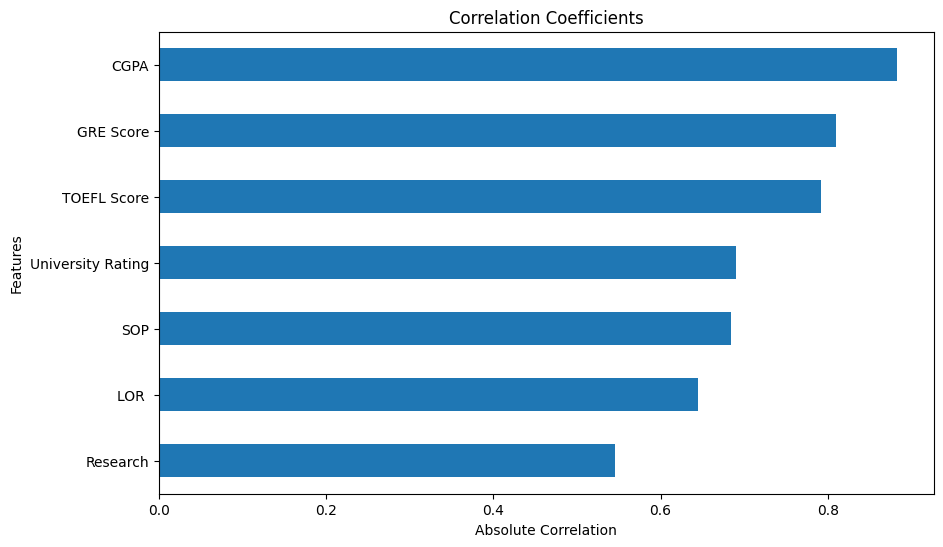

In [96]:
# Calculate correlation coefficients
correlation = df.corr()["Chance of Admit "].drop({"Chance of Admit ","Serial No."})

# Visualize significant contributions of each feature
plt.figure(figsize=(10, 6))
correlation.abs().sort_values().plot(kind='barh')
plt.title("Correlation Coefficients")
plt.xlabel("Absolute Correlation")
plt.ylabel("Features")
plt.show()



In [97]:
s = correlation
so = s.sort_values(ascending=False)
top_features = so.index[:3]
print(so)
print(top_features)

CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit , dtype: float64
Index(['CGPA', 'GRE Score', 'TOEFL Score'], dtype='object')


In [98]:
X = df[top_features]
y = df['Chance of Admit ']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance
performance_before = model.score(X_test, y_test)
print("Linear Regression R^2 Score (Before feature selection):", performance_before)

Linear Regression R^2 Score (Before feature selection): 0.7938361330040756


We see that there is an improvement in model's performance after doing feature selection.

**Logistic Regression Model**

In [99]:
# Split data into features and target
X_logistic = df.drop(columns=['Serial No.', 'Chance of Admit ', 'Admit Category'])
y_logistic = df['Admit Category']

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_logistic, y_logistic)

# Evaluate accuracy
accuracy = logistic_model.score(X_logistic, y_logistic)
print("Accuracy:", accuracy)

Accuracy: 0.742


10-fold cross validation on Linear and Logistic Regression Model.

In [100]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

k_folds = 10
# Define the linear regression and logistic regression models
linear_model = LinearRegression()
logistic_model = LogisticRegression(solver='liblinear')

# Perform k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for train_index, test_index in kf.split(df):
    # Split the dataset into training and testing sets for this fold
    X_train, X_test = df.iloc[train_index, :-1], df.iloc[test_index, :-1]
    y_train, y_test = df.iloc[train_index, -1], df.iloc[test_index, -1]

    # Train and evaluate linear regression
    linear_model.fit(X_train, y_train)
    linear_pred = linear_model.predict(X_test)

    # Train and evaluate logistic regression
    logistic_model.fit(X_train, y_train)
    logistic_pred = logistic_model.predict(X_test)
    print(classification_report(y_test, logistic_pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.54      0.39      0.45        18
           2       0.70      0.96      0.81        27

    accuracy                           0.66        50
   macro avg       0.75      0.45      0.42        50
weighted avg       0.67      0.66      0.60        50

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.75      0.68      0.71        22
           2       0.77      0.96      0.85        24

    accuracy                           0.76        50
   macro avg       0.84      0.55      0.52        50
weighted avg       0.78      0.76      0.72        50

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.38      0.80      0.52        10
           2       0.93      0.77      0.84        35

    accuracy        

Logistic Regression using Sigmoid function

In [101]:
df['binary_target'] = (df['Chance of Admit '] >= 0.5).astype(int)

# Split the dataset into features and target variable
X = df.drop(columns=['Chance of Admit ', 'binary_target'])
y = df['binary_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

4/4 [==============================] - 0s 3ms/step
Logistic Regression Accuracy: 0.91


### **We see that accuracy of the model is good as compared to Linear Regression model (79.38%).**

Varying epochs (increasing) to observe changes in accuracy of the model

In [102]:
df['binary_target'] = (df['Chance of Admit '] >= 0.5).astype(int)

X = df.drop(columns=['Chance of Admit ', 'binary_target'])
y = df['binary_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=110, batch_size=32, verbose=0)

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

4/4 [==============================] - 0s 3ms/step
Logistic Regression Accuracy: 0.99


Increasing Hyperparameters like epoch leads to an increase in accuracy at the cost of speed of running the program

In [103]:
df['binary_target'] = (df['Chance of Admit '] >= 0.5).astype(int)

# Split the dataset into features and target variable
X = df.drop(columns=['Chance of Admit ', 'binary_target'])
y = df['binary_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100, batch_size=40, verbose=0)

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

4/4 [==============================] - 0s 3ms/step
Logistic Regression Accuracy: 0.88


Whereas increase in batch size leads to decrease in accuracy of the model.

In [104]:
df['binary_target'] = (df['Chance of Admit '] >= 0.7).astype(int)

# Split the dataset into features and target variable
X = df.drop(columns=['Chance of Admit ', 'binary_target'])
y = df['binary_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.7).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

4/4 [==============================] - 0s 4ms/step
Logistic Regression Accuracy: 0.83


Increase in threshold value lead to decrease in accuracy of the model.

In [105]:
df['binary_target'] = (df['Chance of Admit '] >= 0.4).astype(int)

X = df.drop(columns=['Chance of Admit ', 'binary_target'])
y = df['binary_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=120, batch_size=32, verbose=0)

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.4).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

4/4 [==============================] - 0s 3ms/step
Logistic Regression Accuracy: 0.99


Decrease in threshold value leads to increase in accuracy of the model.